# 네이버 VIEW - 웹 크롤링 후 텍스트 형식으로 저장

## Step 1. 필요한 모듈과 함수를 임포트하고 검색어 입력받기

In [1]:
from bs4 import BeautifulSoup

In [2]:
from selenium import webdriver

In [3]:
import time

In [4]:
import sys

In [5]:
query_txt = input('크롤링할 키워드는 무엇입니까? : ')

크롤링할 키워드는 무엇입니까? : 영화


In [6]:
query_txt

'영화'

## Step 2. 크롤링 결과 데이터를 저장할 디렉토리와 파일명 지정하기

In [7]:
ft_name = input('검색 결과를 저장할 txt 파일경로와 파일명은?(예시: C:/temp/네이버_VIEW_영화.txt)') 
fc_name = input('검색 결과를 저장할 csv 파일경로와 파일명은? (예시: C:/temp/네이버_VIEW_영화.csv)') 
fx_name = input('검색 결과를 저장할 xlsx 파일경로와 파일명은? (예시: C:/temp/네이버_VIEW_영화.xlsx)') 

검색 결과를 저장할 txt 파일경로와 파일명은?(예시: C:/temp/네이버_VIEW_영화.txt)C:/temp/네이버_VIEW_영화.txt
검색 결과를 저장할 csv 파일경로와 파일명은? (예시: C:/temp/네이버_VIEW_영화.csv)C:/temp/네이버_VIEW_영화.csv
검색 결과를 저장할 xlsx 파일경로와 파일명은? (예시: C:/temp/네이버_VIEW_영화.xlsx)C:/temp/네이버_VIEW_영화.xlsx


## Step 3. 크롬 드라이버를 사용해서 웹 브라우저 실행하기

In [10]:
path = 'C:/Temp/chromedriver_112/chromedriver.exe'

In [11]:
path

'C:/Temp/chromedriver_112/chromedriver.exe'

In [12]:
driver = webdriver.Chrome(path)

## Step 4.  네이버 홈페이지 들어가기

In [13]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="b9d6c1d1b4898f1d4d735f2056427430")>

In [14]:
driver.get('https://www.naver.com')
time.sleep(2)

## Step 5. 입력 창 클릭하여 검색어 전달하기

F12 키를 이용하여 입력창에 해당하는 HTML 소스 코드 부분을 찾는다.     
id를 활용할 경우, id name은 query 임을 찾음  

In [15]:
element = driver.find_element_by_id('query') 

In [16]:
element

<selenium.webdriver.remote.webelement.WebElement (session="b9d6c1d1b4898f1d4d735f2056427430", element="b2c338de-2690-4cc0-9a08-92197061881e")>

In [17]:
element.send_keys(query_txt)

## Step 6. 검색 버튼 눌러서 실행하기

F12 키를 이용하여 검색 버튼에 해당하는 HTML 소스 코드 부분을 찾는다.  

id을 활요알 경우, id name은 search_btn 임을 찾음  

In [18]:
driver.find_element_by_id('search_btn').click()
time.sleep(2)

## Step 7. BeautifulSoup 활용하여 파싱하기

네이버 VIEW 해당하는 소스 코드 찾기  

VIEW 에 해당하는 xpath는 //*[@id="lnb"]/div[1]/div/ul/li[2]/a  찾음  

In [19]:
driver.find_element_by_xpath('//*[@id="lnb"]/div[1]/div/ul/li[2]/a').click()

In [39]:
full_html = driver.page_source

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/112.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="영화 : 네이버 VIEW검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'영화\'의 네이버 VIEW검색 결과입니다."> <meta name="description" lang="ko" content="\'영화\'의 네이버 VIEW검색 결과입니다."> <title>영화 : 네이버 VIEW검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="styleshee
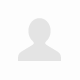
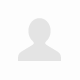
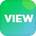

In [40]:
full_html

In [41]:
type(full_html)

str

In [42]:
soup = BeautifulSoup(full_html, 'html.parser') 

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/112.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="영화 : 네이버 VIEW검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'영화'의 네이버 VIEW검색 결과입니다." property="og:description"/> <meta content="'영화'의 네이버 VIEW검색 결과입니다." lang="ko" name="description"/> <title>영화 : 네이버 VIEW검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https
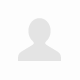
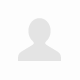
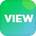

In [43]:
soup

In [44]:
type(soup)

bs4.BeautifulSoup

In [45]:
# class name으로 태그 찾기
# ul 태그에 해당하는 class name은  lst_total _list_base  찾음

content_list = soup.find('ul', class_ = 'lst_total _list_base').find_all('li') 

In [46]:
print(content_list)

[<li class="bx _svp_item" data-cr-area="rvw*w" data-cr-gdid="90000003_0000000000000033EFCCE1C7" data-cr-rank="1"> <div class="total_wrap api_ani_send"> <div class="total_area"> <div class="total_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://blog.naver.com/pooh0512/223066513863" href="#" onclick="tCR('a=rvw*w.kep&amp;r=1&amp;i=90000003_0000000000000033EFCCE1C7&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=rvw*w.kepoff&amp;r=1&amp;i=90000003_0000000000000033EFCCE1C7&amp;u=javascript" data-cr-on="a=rvw*w.kepon&amp;r=1&amp;i=90000003_0000000000000033EFCCE1C7&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a=rvw*w.kephome&amp;r=1&amp;i=90000003_0000000000000033EFCCE1C7

In [51]:
type(content_list)

bs4.element.ResultSet

In [53]:
count = 1
for i in content_list:    
    print('●', count, i.text.strip())
    print('-'*50)
    count += 1   


● 1 문서 저장하기  Keep에 저장 Keep 바로가기        인플루언서2023.04.06.  시간의마법사  넷플릭스 길복순 : 알고 보면 더 재밌는 '길복순' 관련 비하인드 정보 10 (액션 영화 추천)                                             이전 다음    길복순 감독 변성현 출연 전도연, 설경구, 김시아 개봉 미개봉 넷플릭스 영화 <길복순> 개인적으로 제가... 그럼에도 이 영화 <길복순>은 스트리밍 되는 넷플릭스 오리지널 작품이라 다행이지만 사실 <불한당> 같은 경우도...    눈길 가는 신작 영화들이 꽤 있다?!_집에서 볼만한 넷플릭스 영화 추천 7 영화 유령 보기 전 알고 가면 좋은 시시콜콜한 몇 가지 정보 7   함께 볼만한 검색어  이 정보가 표시된 이유  문서를 기반으로 함께 볼만한 검색어를 분석하여 제공하는 서비스입니다.  피드백 제공하기도움말  정보확인 레이어 닫기         길복순   함께 볼만한 검색어 닫기   함께 볼만한 검색어  이 정보가 표시된 이유  문서를 기반으로 함께 볼만한 검색어를 분석하여 제공하는 서비스입니다.  피드백 제공하기도움말  정보확인 레이어 닫기         불릿 트레인        기예르모 델토로의 피노키오        외계+인 1부        헤어질 결심        헌트        20세기 소녀    이전 다음 함께 볼만한 검색어 닫기   함께 볼만한 검색어  이 정보가 표시된 이유  문서를 기반으로 함께 볼만한 검색어를 분석하여 제공하는 서비스입니다.  피드백 제공하기도움말  정보확인 레이어 닫기         유령   함께 볼만한 검색어 닫기
--------------------------------------------------
● 2 문서 저장하기  Keep에 저장 Keep 바로가기        인플루언서2023.04.02.  영화를 소개하는 남자  넷플릭스 영화 순위 3월 가장 인기 높았던 넷플릭스 영화 추천 6                

In [56]:
#데이터셋 구축을 위한 리스트 생성

no_list = []    #게시글 번호
title_list = []   #게시글 제목
contents_list = []  #게시글 요약
date_list = []   #게시글 작성일자
nickname_list = []  #게시글 작성자 닉네임 

no = 1
f = open(ft_name, 'w', encoding='utf-8')

for i in content_list:
    no_list.append(no)  #판다스 작업을 위해 리스트 생성
    f.write('1.번호:' + str(no) + "\n")  #텍스트 파일에 저장
    print('[', no, ']')  #화면에 출력 
    
    # i_txt_lines total_tit _cross_trigger 제목에 해당하는 클래스명을 확인
    title = i.find('a', 'api_txt_lines total_tit _cross_trigger').get_text()
    title_list.append(title)  #판다스 작업을 위해 리스트 생성
    f.write('2.제목:' + str(title) + "\n")  #텍스트 파일에 저장
    print('▶ title : ', title)  #화면에 출력    
    
    # api_txt_lines dsc_txt 요약 내용에 해당하는 클래스명을 확인
    contents = i.find('div', 'api_txt_lines dsc_txt').get_text()
    contents_list.append(contents)  #판다스 작업을 위해 리스트 생성
    f.write('3.요약내용:' + str(contents) + "\n")  #텍스트 파일에 저장
    print('▶ contents : ', contents)  #화면에 출력   
          
    # sub_time sub_txt 작성 일자에 해당하는 클래스명을 확인
    date = i.find('span', 'sub_time sub_txt').get_text()
    date_list.append(date)  #판다스 작업을 위해 리스트 생성
    f.write('4.작성일자:' + str(date) + "\n")  #텍스트 파일에 저장
    print('▶ date : ', date)  #화면에 출력       
    

    # sub_txt sub_name 작성자 닉네임에 해당하는 클래스명을 확인
    nickname = i.find('a', 'sub_txt sub_name').get_text()
    nickname_list.append(nickname)  #판다스 작업을 위해 리스트 생성
    f.write('5.작성자 닉네임:' + str(nickname) + "\n")  #텍스트 파일에 저장
    print('▶ nick name : ', nickname)  #화면에 출력  
    
    f.write('='*80 + "\n")
    print('\n')
    no += 1

f.close()

[ 1 ]
▶ title :  넷플릭스 길복순 : 알고 보면 더 재밌는 '길복순' 관련 비하인드 정보 10 (액션 영화 추천)
▶ contents :  길복순 감독 변성현 출연 전도연, 설경구, 김시아 개봉 미개봉 넷플릭스 영화 <길복순> 개인적으로 제가... 그럼에도 이 영화 <길복순>은 스트리밍 되는 넷플릭스 오리지널 작품이라 다행이지만 사실 <불한당> 같은 경우도...
▶ date :  2023.04.06.
▶ nick name :  시간의마법사


[ 2 ]
▶ title :  넷플릭스 영화 순위 3월 가장 인기 높았던 넷플릭스 영화 추천 6
▶ contents :  넷플릭스 영화 순위 3월 가장 인기 높았던 넷플릭스 영화 추천 안녕하세요, 영소남입니다. 이 특집 포스팅을 작성할 때마다 시간이 참 빠르게 흘러간다는 게 실감이 나는 것 같습니다. 3월이 지나고 따뜻한 날씨와 함께...
▶ date :  2023.04.02.
▶ nick name :  영화를 소개하는 남자


[ 3 ]
▶ title :  넷플릭스 영화 추천 집에서 볼만한 요즘 최근 무비 베스트 10개
▶ contents :  넷플릭스 영화 추천 집에서 볼만한 요즘 최근 무비 베스트 10개 일주일에 두번 정도 계속 쓰고 있는 영화추천 포스팅! 이번에는 2022년에 개봉했던 인기작들 위주로 소개해볼까 한다. 제작은 2021년에 되었지만 공개는...
▶ date :  2일 전
▶ nick name :  Der Sinn des Lebens


[ 4 ]
▶ title :  2022년도 최악의 worst 영화를 정리해보았습니다. [jY's 무비리뷰]
▶ contents :  올해도 여러 편의 영화를 보았는데 영화리뷰는 127편 정도를 남겼습니다. 2022년을 가볍게 정리할 겸 리뷰를 남긴 127편의 영화 기준으로, 그래도 조금은 알려진 네임드작품 중에서 최악의 영화를 정리해보았습니다. 총...
▶ date :  2022.12.31.
▶ nick name :  ★ 무비 JY's 영화공간 ★


[ 

## 4월 26일 수요일 여기서 부터 
## Step 8. 크롤링 결과를 텍스트 데이터 파일로 저장하기 

sys.stdout 은 표준 출력 장치를 확인할 수 있다.  
디폴트 오리지널 표준 출력 장치는 모니터이다.  

In [56]:
sys.stdout

In [57]:
orig_stdout = sys.stdout

In [58]:
f_name

'C:/temp/네이버_VIEW.txt'

In [59]:
f = open(f_name, 'a', encoding='utf-8') 

In [60]:
f

<_io.TextIOWrapper name='C:/temp/네이버_VIEW.txt' mode='a' encoding='utf-8'>

In [61]:
# 표준 출력 장치를 모니터가 아닌, 파일로 변경
# print 함수의 결과가 모니터가 아닌 파일에 출력된다. 

sys.stdout = f 

In [62]:
count = 1

for i in content_list:
    print('●', count, i.text.strip())
    print('-'*50)
    count += 1

In [55]:
#print("데이터 크롤링 성공 !!!")

In [63]:
sys.stdout = orig_stdout

In [64]:
print("데이터 크롤링 성공 !!!")

데이터 크롤링 성공 !!!


In [65]:
f

<_io.TextIOWrapper name='C:/temp/네이버_VIEW.txt' mode='a' encoding='utf-8'>

In [66]:
f.close()

## Step 9. 한번 더 총 마무리 

In [68]:
 orig_stdout = sys.stdout

In [70]:
f = open(f_name, 'w', encoding='utf-8')

In [71]:
f

<_io.TextIOWrapper name='C:/temp/네이버_VIEW.txt' mode='w' encoding='utf-8'>

In [72]:
sys.stdout = f

In [75]:
html = driver.page_source

In [76]:
soup = BeautifulSoup(html, 'html.parser')

In [78]:
content_list = soup.find('ul', class_ = 'lst_total _list_base').find_all('li') 

In [80]:
for i in content_list :
    print(i.text.strip())
    print('\n')
    
sys.stdout = orig_stdout
f.close()